# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in this lab's data folder.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [1]:
# import libraries here
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [2]:
# your code here
temp = pd.read_csv('../data/Temp_States.csv',sep=';')

#### Print `temp`.

In [3]:
# your code here
print(temp)

         City        State  Temperature  Unnamed: 3
0         NYC     New York    19.444444         NaN
1      Albany     New York     9.444444         NaN
2     Buffalo     New York     3.333333         NaN
3    Hartford  Connecticut    17.222222         NaN
4  Bridgeport  Connecticut    14.444444         NaN
5      Treton   New Jersey    22.222222         NaN
6      Newark   New Jersey    20.000000         NaN


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [4]:
# your code here
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
City           7 non-null object
State          7 non-null object
Temperature    7 non-null float64
Unnamed: 3     0 non-null float64
dtypes: float64(2), object(2)
memory usage: 232.0+ bytes


In [7]:
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,7.0,15.15873,6.695265,3.333333,11.944444,17.222222,19.722222,22.222222
Unnamed: 3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
"""
We have strings (object), floats for temperatures and for a column called "Unnamed: 3", which has nothing...
"""

#### Select the rows where state is New York.

In [32]:
# your code here
temp_ny = temp.query("State == 'New York'")

#### What is the average temperature of cities in New York?

In [34]:
# your code here
temp_ny.Temperature.mean()

10.740740739000001

#### Which states and cities have a temperature above 15 degrees Celsius?

In [44]:
# your code here
print(f'Cities: {temp.query("Temperature > 15").City.unique()}')
print(f'\nStates: {temp.query("Temperature > 15").State.unique()}')

Cities: ['NYC' 'Hartford' 'Treton' 'Newark']

States: ['New York' 'Connecticut' 'New Jersey']


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [45]:
# your code here
print(f'Cities: {temp.query("Temperature > 15").City.unique()}')

Cities: ['NYC' 'Hartford' 'Treton' 'Newark']


#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [52]:
# your code here
print(temp.query("Temperature > 15 and Temperature < 20").City.unique())

['NYC' 'Hartford']


#### Find the mean and standard deviation of the temperature of each state.

In [65]:
# your code here
media = temp.groupby(by='State').mean().loc[:,['Temperature']]
despd = temp.groupby(by='State').std().loc[:,['Temperature']]
media.join(despd, lsuffix='_mean', rsuffix='_std', on='State').reset_index()

,State,Temperature_mean,Temperature_std
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [138]:
# your code here
employees = pd.read_csv('../data/employees.csv',sep=';',usecols=['Name', 'Department', 'Education', 'Gender', 'Title', 'Years', 'Salary'])
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the `employees` dataframe. Comment your results.

In [77]:
# your code here
employees.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [0]:
"""
We have strings (object) for data like names, deparments, education, gendera and title.
We also have integer for for years and salary.
"""

#### What's the average salary in this company?

In [81]:
# your code here
employees.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [82]:
# your code here
employees.Salary.max()

70

#### What's the lowest salary?

In [83]:
# your code here
employees.Salary.min()

30

#### Who are the employees with the lowest salary?

In [91]:
# your code here
min_sal =  employees.Salary.min()
employees.query('Salary == 30')

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find all the information about an employee called David.

In [92]:
# your code here
employees.query('Name == "David"')

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you return only David's salary?

In [93]:
# your code here
employees.query('Name == "David"').Salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate.

In [94]:
# your code here
employees.query('Title == "associate"')

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [95]:
# Method 1
# your code here
employees.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [99]:
# Method 2
# your code here
employees.iloc[0:3,:]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees whose title is associate and whose salary is above 55.

In [104]:
# your code here
employees.query('Salary > 55 and Title == "associate"')

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [107]:
# your code here
employees.groupby(by='Years').mean().reset_index()

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average salary per title?

In [108]:
# your code here
employees.groupby(by='Title').mean().reset_index()

,Title,Years,Salary
0,VP,8.00,70.000000
1,analyst,2.25,32.500000
2,associate,4.00,56.666667


####  Find the salary quartiles.


In [116]:
# your code here
employees.describe().T.loc[:,['25%','50%','75%']].loc[['Salary']]

,25%,50%,75%
Salary,35.0,55.0,60.0


#### Is the mean salary different per gender?

In [117]:
# your code here
employees.groupby(by='Gender').mean()

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [119]:
# your code here
employees.describe().T.loc[:,['min','mean','max']]

,min,mean,max
Years,1.0,4.111111,8.0
Salary,30.0,48.888889,70.0


#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [136]:
# your code here
df = employees.loc[:,['Department','Salary']].groupby(by='Department').agg([max, min]).Salary
df['diff'] = df.loc[:,'max'] - df.loc[:,'min']
df

,max,min,diff
Department,,,
HR,70,30,40
IT,70,30,40
Sales,55,55,0


# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [9]:
# your code here
orders = pd.read_csv('../data/Orders.csv', sep=',' , index_col='Unnamed: 0')

#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [150]:
# your code here
orders.dtypes

InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [151]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


In [12]:
orders.isna().sum().sum()

0

In [0]:
"""
We have data as strings (object), for like StockCode, Description, country and InvoiceDate.
We also have numeric data (int64), like dates (Y,M,D), with not a single empty value ('NaN').
"""

####  What is the average purchase price?

In [163]:
# your code here
orders.amount_spent.mean()

22.394748504739596

#### What are the highest and lowest purchase prices? 

In [164]:
# your code here
hi = orders.amount_spent.max()
lo = orders.amount_spent.min()
print(f'max:{hi}\nmin:{lo}')

max:168469.6
min:0.0


#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [177]:
# your code here
sp_cust = orders.query('Country == "Spain"').loc[:,'CustomerID'].unique()
sp_cust

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442], dtype=int64)

#### How many customers do we have in Spain?

In [176]:
# your code here
sp_cust.shape[0]

30

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [190]:
# your code here
orders.query('Quantity > 50').loc[:,['CustomerID']]

,CustomerID
46,13748
83,15291
96,14688
102,14688
176,16029
...,...
541702,18102
541703,16626
541711,16626
541746,15311


#### Select orders from Spain that include more than 50 items.

In [193]:
# your code here
orders.query('Quantity > 50 and Country == "Spain"').loc[:,['InvoiceNo']].head()

,InvoiceNo
6421,536944
6422,536944
6423,536944
6424,536944
6425,536944


#### Select all free orders.

In [196]:
# your code here
orders.query('amount_spent == 0').head()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [206]:
# your code here
orders[orders['Description'].str.contains('lunch bag')].head()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all `lunch bag` orders made in 2011.

In [208]:
# your code here
orders[orders['Description'].str.contains('lunch bag')].query('year == 2011').head()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

Text(1350.0, 2020, 'maximum value')

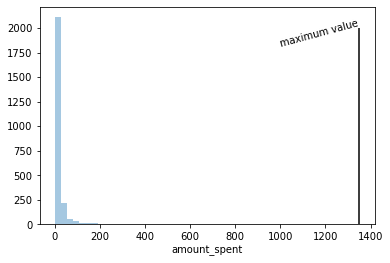

In [232]:
# your code here
spainspent = orders.query('Country == "Spain"').amount_spent


sns.distplot(spainspent, kde=False)
plt.vlines(x = spainspent.max(), ymin= 0 , ymax=2000)
plt.text(spainspent.max(), 2020, 'maximum value', ha='right', rotation=15, wrap=True)

#### Select all orders made in the month of August.

In [239]:
# your code here
orders.query('month == 8').loc[:,'InvoiceNo']

285421    561904
285422    561904
285423    561905
285424    561905
285425    561905
           ...  
320688    565067
320689    565067
320690    565067
320691    565067
320692    565067
Name: InvoiceNo, Length: 27013, dtype: int64

#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [244]:
orders.Country.value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

#### What's the  average amount of money spent by country?

In [247]:
# your code here
orders.groupby(by='Country').mean().loc[:,'amount_spent']

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [251]:
# your code here
orders.query(f'UnitPrice == {orders.UnitPrice.max()}')

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What is the average amount spent per year?

In [264]:
# your code here
amount = orders.loc[:,['year','amount_spent']].groupby(by='year').sum().amount_spent.mean()
print(f'the average amount spent per year is {round(amount/10**6,3)} million')

the average amount spent per year is 4.456 million
